## IMDB Highest Grossing Movies Analysis

The dataset is in tabular format and is obtained from IMDB api. It contains information about some of the highest grossing movies of all time.

In [19]:
%matplotlib notebook

import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set figure size for all plots
FIGSIZE = (8, 4)

plt.get_backend()

'nbAgg'

In [20]:
# Read movies data
df = pd.read_csv('./data/imdb/movies_data.csv')

In [21]:
# Get title
result_df = df[['Title']].copy()

# Get release date and convert to datetime type
result_df['release_date'] = pd.to_datetime(df['Released'])

# Get IMDB votes, remove all commas and convert to int type
result_df['imdbVotes'] = df['imdbVotes'].apply(lambda x: x.replace(',', '')).astype(int)

# Get imdb rating
result_df['imdbRating'] = df['imdbRating']

# Show some data
result_df.head()

,Title,release_date,imdbVotes,imdbRating
0,Avatar,2009-12-18,1033303,7.8
1,Pirates of the Caribbean: At World's End,2007-05-25,552467,7.1
2,The Lone Ranger,2013-07-03,207397,6.4
3,John Carter,2012-03-09,237556,6.6
4,The Dark Knight Rises,2012-07-20,1372667,8.4


### Total IMDB Votes by release year

Number of overall votes generally increased overtime (decreased during the financial crises?), this could be due to increase in number of users on imdb.

<IPython.core.display.Javascript object>


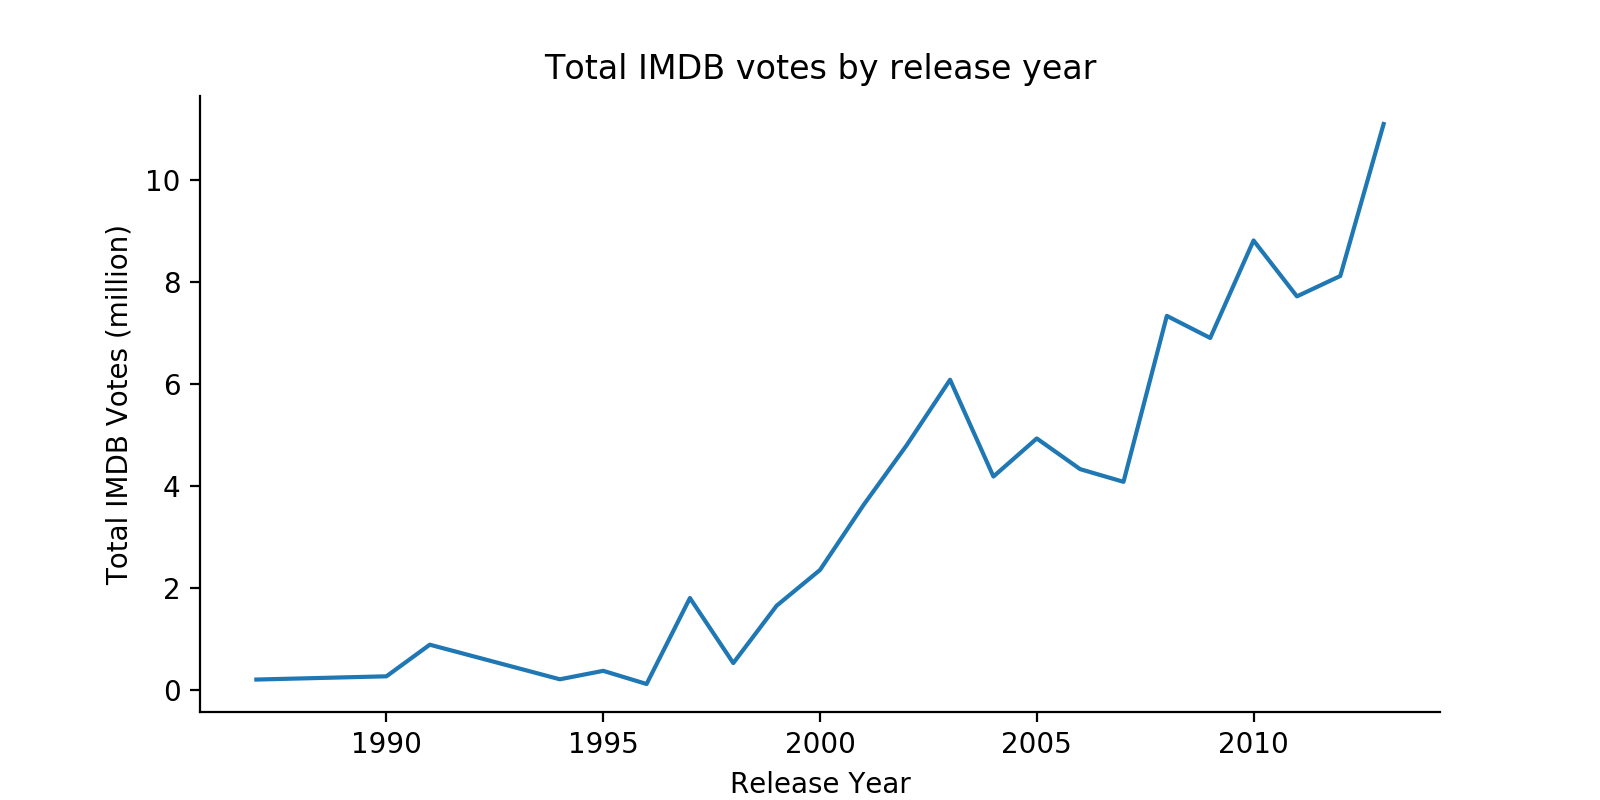

In [22]:
column = 'imdbVotes'
func = 'sum'

release_date_votes = result_df.groupby(result_df['release_date'].dt.year).agg({column: func})

plt.figure(figsize=FIGSIZE)
x, y = release_date_votes.index, release_date_votes[column]
plt.plot(x, y)

# Remove top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set y tick labels
plt.gca().set_yticklabels(['', '0','2','4','6','8','10'])

# Set title and x, y labels
plt.title('Total IMDB votes by release year')
plt.xlabel('Release Year')
plt.ylabel('Total IMDB Votes (million)')

plt.show()

### Average IMDB Votes by release year

We see a sharp drop in the average number of votes from 1992 to 1995.

<IPython.core.display.Javascript object>


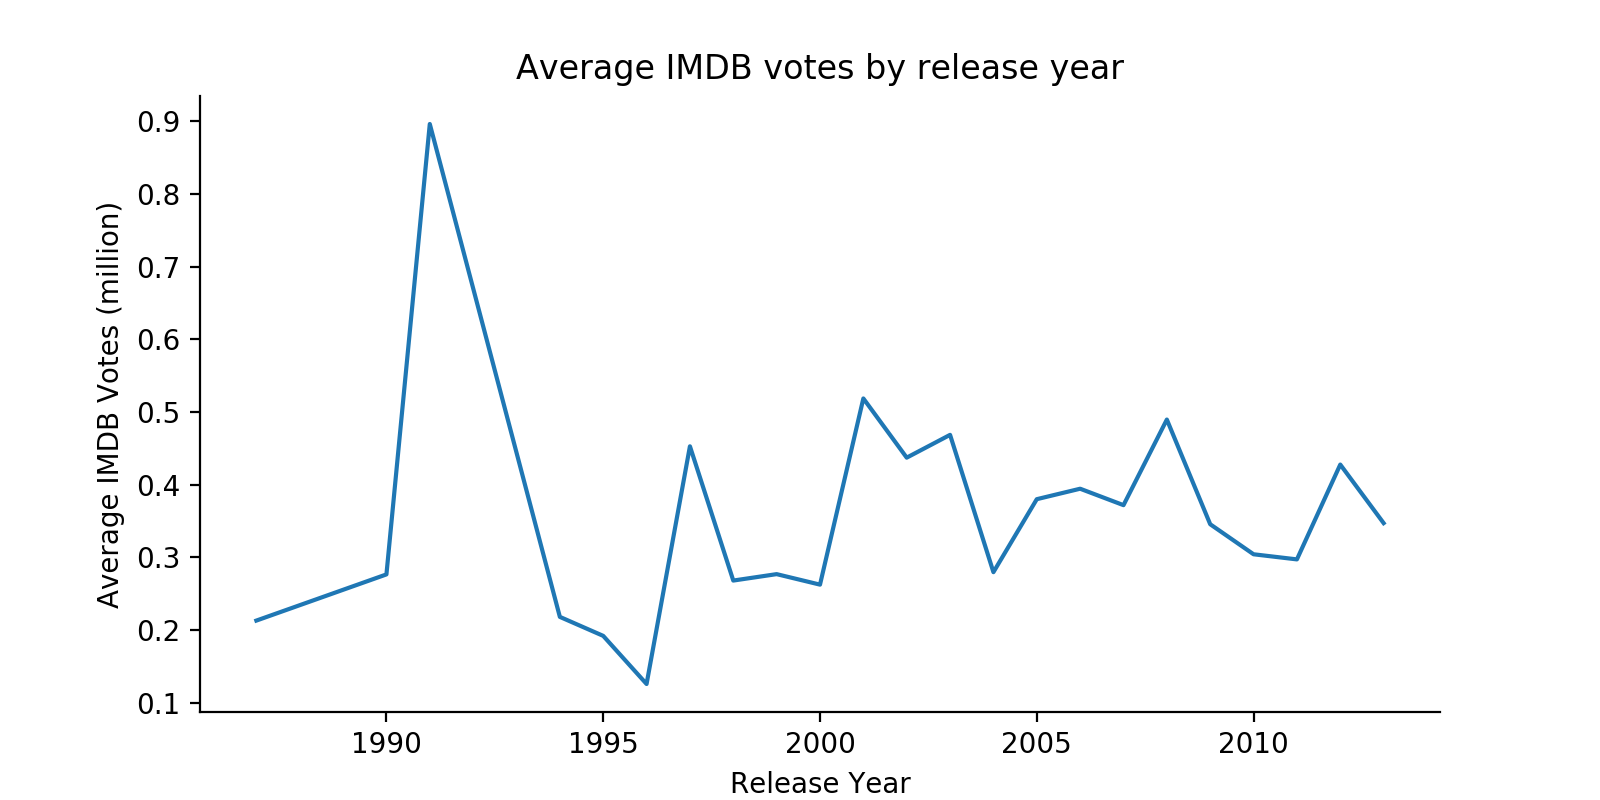

In [23]:
column = 'imdbVotes'
func = 'mean'

release_date_votes = result_df.groupby(result_df['release_date'].dt.year).agg({column: func})

plt.figure(figsize=FIGSIZE)
x, y = release_date_votes.index, release_date_votes[column]
plt.plot(x, y)

# Remove top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.gca().set_yticklabels([round(x, 1) for x in np.arange(0, 1, 0.1)])

plt.xlabel('Release Year')
plt.ylabel('Average IMDB Votes (million)')
plt.title('Average IMDB votes by release year')

plt.show()

### Average IMDB rating by release year

Again, we see a drop in the average imdb ratings from 1992 to 1995.

<IPython.core.display.Javascript object>


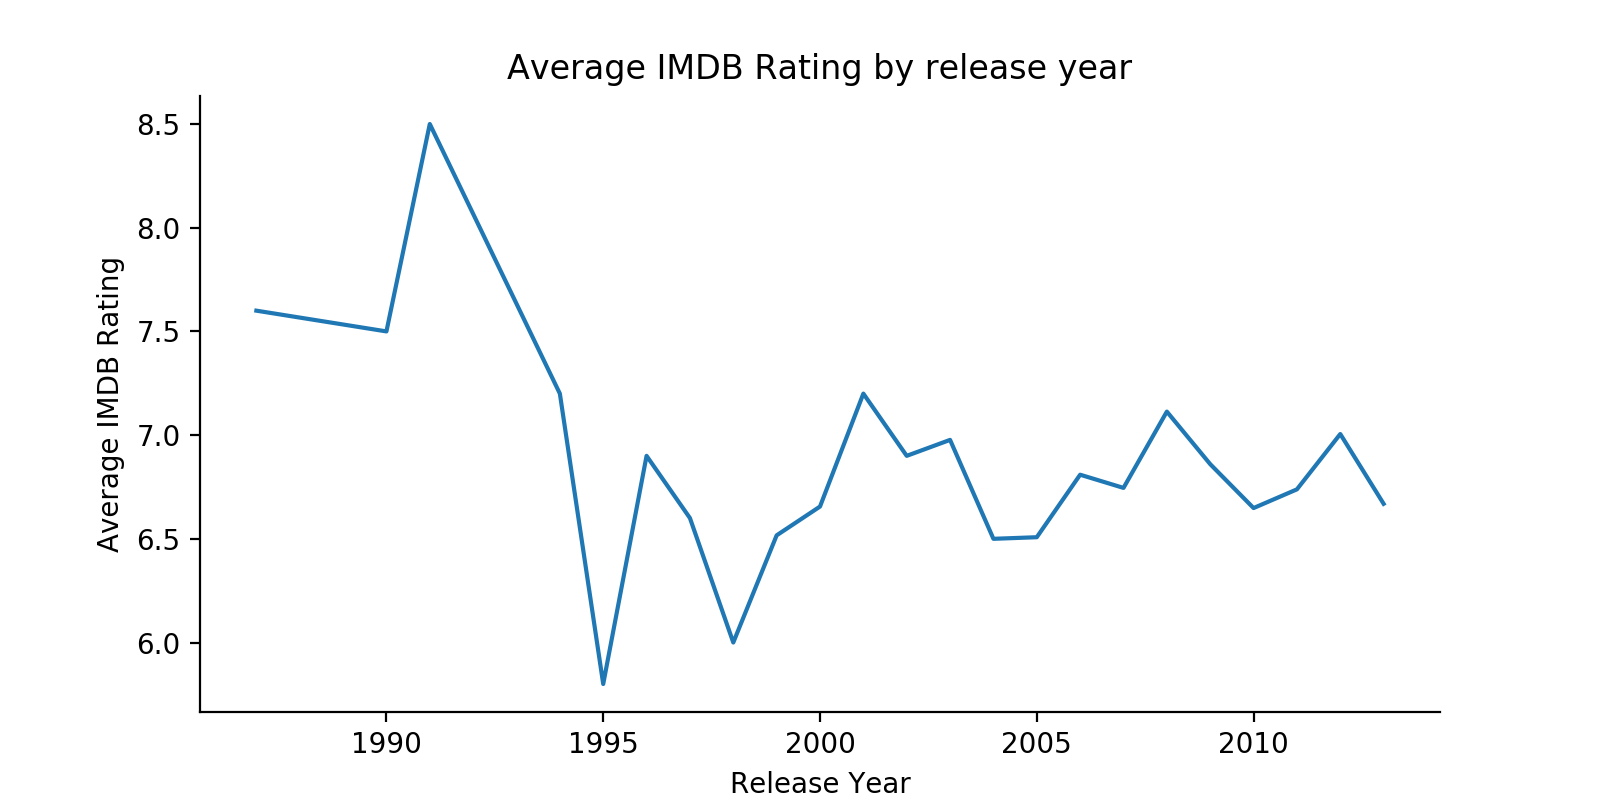

In [24]:
column = 'imdbRating'
func = 'mean'

release_date_votes = result_df.groupby(result_df['release_date'].dt.year).agg({column: func})

plt.figure(figsize=FIGSIZE)
x, y = release_date_votes.index, release_date_votes[column]
plt.plot(x, y)

# Remove top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Average IMDB Rating by release year')
plt.xlabel('Release Year')
plt.ylabel('Average IMDB Rating')

plt.show()

### Average IMDB rating by month of the year

We see that movies that come out in December are rated the highest on average. 

<IPython.core.display.Javascript object>


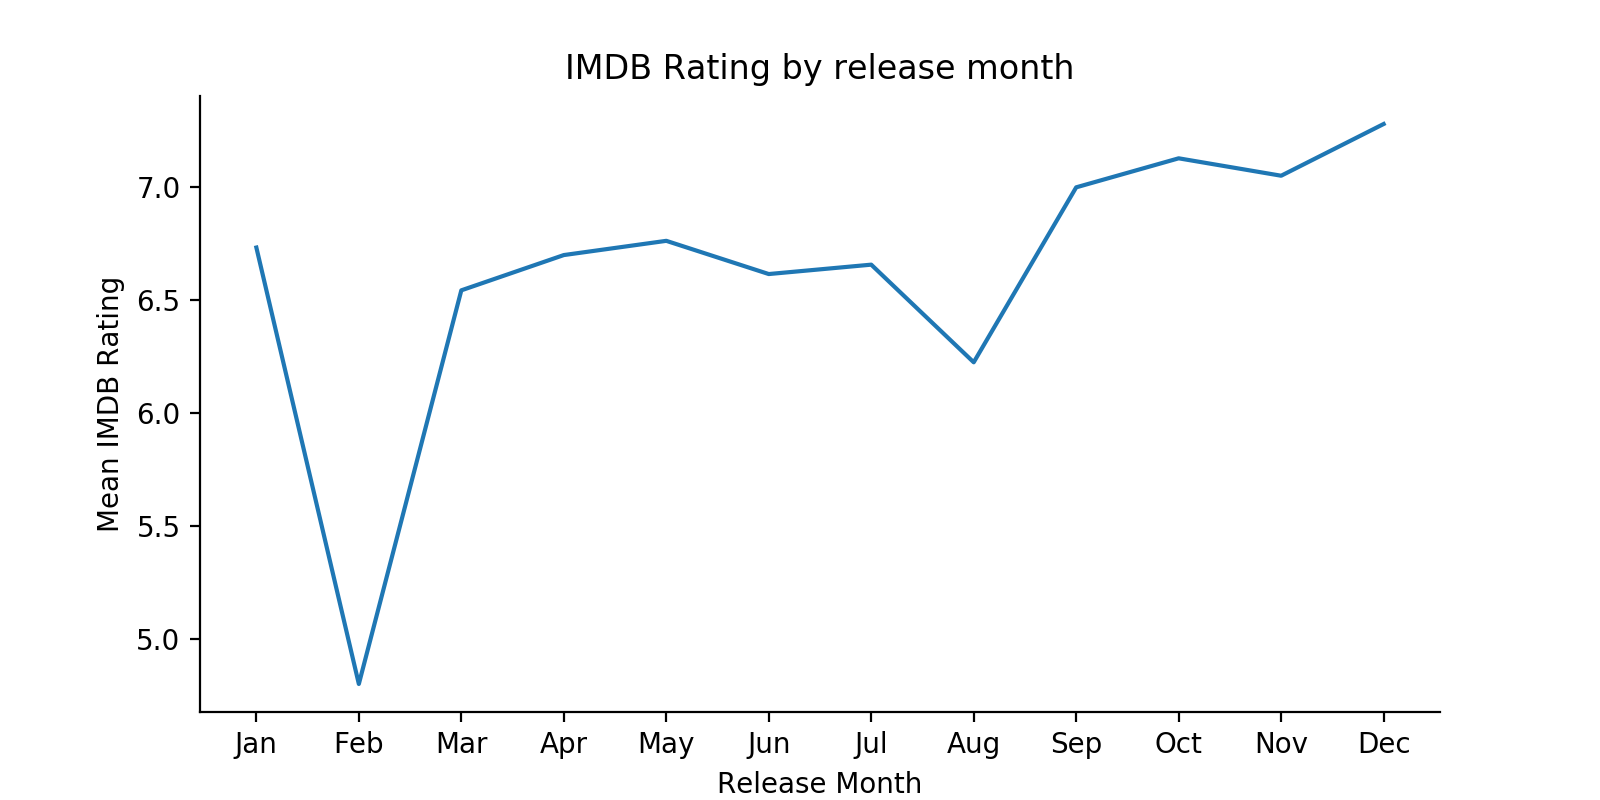

In [25]:
column = 'imdbRating'
func = 'mean'

release_date_votes = result_df.groupby(result_df['release_date'].dt.month).agg({column: func})
release_date_votes['month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=FIGSIZE)
x, y = release_date_votes['month'], release_date_votes[column]
plt.plot(x, y)

# Remove top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('IMDB Rating by release month')
plt.xlabel('Release Month')
plt.ylabel('Mean IMDB Rating')

plt.show()